In [2]:
#All the standard imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
#Import Data
Nat_Gas = pd.read_csv('~/Downloads/Nat_Gas.csv')
print(Nat_Gas)

       Dates  Prices
0   10/31/20   10.10
1   11/30/20   10.30
2   12/31/20   11.00
3    1/31/21   10.90
4    2/28/21   10.90
5    3/31/21   10.90
6    4/30/21   10.40
7    5/31/21    9.84
8    6/30/21   10.00
9    7/31/21   10.10
10   8/31/21   10.30
11   9/30/21   10.20
12  10/31/21   10.10
13  11/30/21   11.20
14  12/31/21   11.40
15   1/31/22   11.50
16   2/28/22   11.80
17   3/31/22   11.50
18   4/30/22   10.70
19   5/31/22   10.70
20   6/30/22   10.40
21   7/31/22   10.50
22   8/31/22   10.40
23   9/30/22   10.80
24  10/31/22   11.00
25  11/30/22   11.60
26  12/31/22   11.60
27   1/31/23   12.10
28   2/28/23   11.70
29   3/31/23   12.00
30   4/30/23   11.50
31   5/31/23   11.20
32   6/30/23   10.90
33   7/31/23   11.40
34   8/31/23   11.10
35   9/30/23   11.50
36  10/31/23   11.80
37  11/30/23   12.20
38  12/31/23   12.80
39   1/31/24   12.60
40   2/29/24   12.40
41   3/31/24   12.70
42   4/30/24   12.10
43   5/31/24   11.40
44   6/30/24   11.50
45   7/31/24   11.60
46   8/31/24 

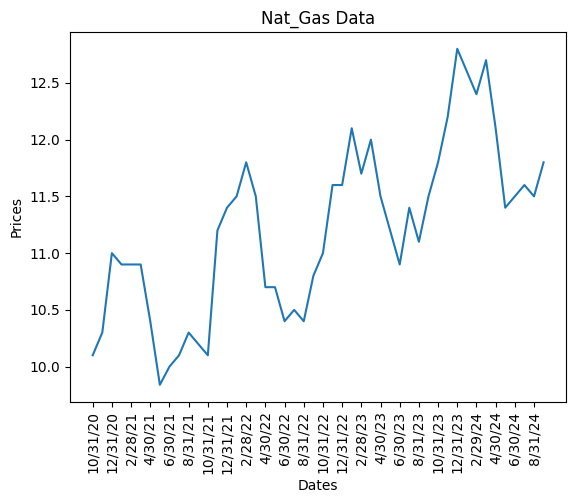

In [4]:
#Visualize the Data
plt.plot(Nat_Gas['Dates'],  Nat_Gas['Prices'])
plt.title('Nat_Gas Data')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(Nat_Gas['Dates'][::2],  rotation='vertical')
plt.show()

In [5]:
#Observations-----------------------
#General Trend upwards
#Lows & Highs are becoming higher over time; inflation?; scarcity?; supply chain issues?
#Winter = Highest Prices; Summer = Lowest Prices; Spring = Starts Dropping Down; Fall = Starts Rising Up
#Given the seasonal nature of this data I see it best to use Seasonal-Trend Decompostion Analysis (STL) to confirm

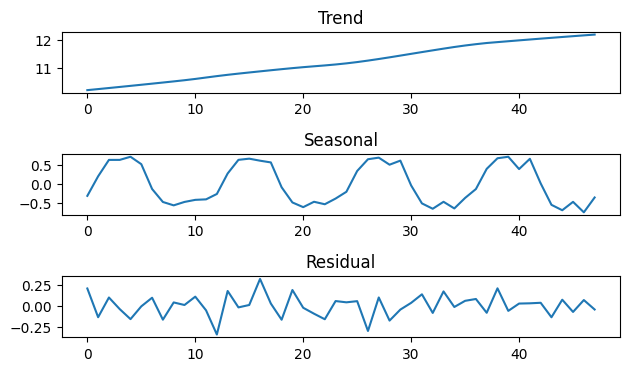

In [6]:
#Set up for STL & Plotting(Since the Dates dont start in Jan, the middle of the graph is winter-time)
from statsmodels.tsa.seasonal import STL
stl = STL(Nat_Gas["Prices"], seasonal=13, period =12)
res = stl.fit()
seasonal, trend, resid = res.seasonal, res.trend, res.resid

plt.subplot(4,1,1)
plt.plot(trend)
plt.title('Trend')

plt.subplot(4,1,2)
plt.plot(seasonal)
plt.title('Seasonal')

plt.subplot(4,1,3)
plt.plot(resid)
plt.title('Residual')

plt.tight_layout()

In [7]:
#Get Just Price Data & Split Data into Train(Everything but last 12) and Test(Last 12) Sets
Prices_df = Nat_Gas["Prices"].copy()
Train_data = Prices_df.iloc[:-12]
Test_data = Prices_df.iloc[-12:]

In [8]:
#We can use the Seasonal Autoregressive Integrated Moving Average (SARIMA) to extrapolate
#set up the autofitter to see which ARIMA paramaters work best with the data set 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(Train_data, order = (0,1,1), seasonal_order = (1,1,1,12))
result = model.fit()

/Users/suchitkalluru/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85484D-01    |proj g|=  2.12286D-01

At iterate    5    f=  1.05077D-01    |proj g|=  5.21522D-02

At iterate   10    f=  8.34968D-02    |proj g|=  2.99419D-02

At iterate   15    f=  8.06020D-02    |proj g|=  2.86757D-03

At iterate   20    f=  8.02509D-02    |proj g|=  1.46682D-03

At iterate   25    f=  8.02106D-02    |proj g|=  1.59176D-03

At iterate   30    f=  8.02090D-02    |proj g|=  4.97075D-03

At iterate   35    f=  8.02085D-02    |proj g|=  1.73000D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [9]:
#Forecast and Error Test Using Mean Squared & Mean Absolute Errors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
forecast = result.get_forecast(steps=12)
predicted = forecast.predicted_mean
mse = mean_squared_error(Test_data, predicted)
mae = mean_absolute_error(Test_data, predicted)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  0.042243838466756674
Mean Absolute Error:  0.16829825149184652


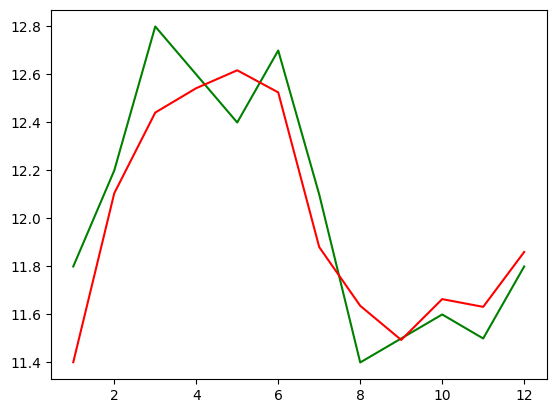

In [10]:
#Visuaize the predictions(red) vs test set(green)
t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.plot(t, Test_data, 'g')
plt.plot(t, predicted, 'r')

In [17]:
#Request User input for date of prediction 
req_year = int(input("Enter the prediction year: "))
req_month = int(input("Enter the prediction month in Numerical Form. ex. January = 1; December = 12: "))

Enter the prediction year: 2030
Enter the prediction month in Numerical Form. ex. January = 1; December = 12: 1


In [18]:
#Forecast & print predicted price
#Extrapolate a minimum of 4 months for simplicity
if req_year == 2024:
    #Extrapolate 4 months
    model = SARIMAX(Prices_df, order = (0,1,1), seasonal_order = (1,1,1,12))
    result = model.fit()
    forecast = result.get_forecast(steps=4)
    predicted = forecast.predicted_mean

    #Return the requested months prediction
    prediction = predicted[req_month - 9 + 47]
else: 
    years_passed = req_year - 2024
    model = SARIMAX(Prices_df, order = (0,1,1), seasonal_order = (1,1,1,12))
    result = model.fit()
    forecast = result.get_forecast(steps= (years_passed * 12) + 4)
    predicted = forecast.predicted_mean
    
    #Go to req_month + 3 for the prediction
    complete_years_passed = years_passed - 1
    prediction = predicted[(req_month + (complete_years_passed * 12) + 4) + 47]

/Users/suchitkalluru/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57165D-01    |proj g|=  3.38830D-01

At iterate    5    f=  4.42054D-02    |proj g|=  1.33796D-01

At iterate   10    f=  2.54720D-02    |proj g|=  1.43383D-01

At iterate   15    f=  2.20539D-02    |proj g|=  6.50190D-02

At iterate   20    f=  2.04571D-02    |proj g|=  1.79757D-02

At iterate   25    f=  1.99177D-02    |proj g|=  3.32613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     42      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [19]:
print("Expected Price: ", prediction)

Expected Price:  15.765085703042123
